In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from itertools import product
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

## Adding noise/outliers in dataset
num_outliers = 20 
outliers = np.random.uniform(low=-10, high=10, size=(num_outliers, 2))

X_with_outliers = np.vstack([X, outliers])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)
print("Data preprocessed and scaled.")


# Function to plot K-distance graph
def plot_k_distance_graph(X, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.title('K-Distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}-NN Distance')
    plt.show()

# Plot K-distance graph for k=4
plot_k_distance_graph(X_scaled, k=4)

Data preprocessed and scaled.


## DBSCAN Algorithm

# Explanation and Interpretation
Parameter Choices:

# eps: 
Represents the maximum distance between two samples for them to be considered as in the same neighborhood.
# min_samples: 
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

# Evaluation Metrics:
Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. Higher values indicate better clustering.

# Calinski-Harabasz Index: 
The ratio of the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better-defined clusters.

# Davies-Bouldin Index: 
The average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

Selecting Optimal eps:

Use the K-distance graph to identify the "knee" point where the distance increases sharply. This point is a good candidate for eps.

Choosing min_samples:

A higher min_samples value requires more points in a neighborhood to form a cluster, which can result in more noise points.

Handling Outliers:

DBSCAN inherently handles outliers as noise points (label= -1).

Guidelines for Different Datasets:

For dense datasets, a smaller eps may be sufficient.

For datasets with varying densities, consider using advanced clustering methods like HDBSCAN.

# Define parameter grid
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(2, 11)
}

# Generate all combinations of parameters
param_combinations = list(product(param_grid['eps'], param_grid['min_samples']))

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette = -1
        calinski_harabasz = -1
        davies_bouldin = -1
    return silhouette, calinski_harabasz, davies_bouldin

# Grid search for best parameters
best_params = None
best_scores = (-1, -1, -1)
results = []

for params in param_combinations:
    eps, min_samples = params
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    scores = evaluate_clustering(X_scaled, labels)
    results.append((params, scores))
    if scores[0] > best_scores[0]:
        best_scores = scores
        best_params = params

print("Best Parameters:", best_params)
print("Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin):", best_scores)

# Define parameter grid
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(2, 11)
}

# Generate all combinations of parameters
param_combinations = list(product(param_grid['eps'], param_grid['min_samples']))

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette = -1
        calinski_harabasz = -1
        davies_bouldin = -1
    return silhouette, calinski_harabasz, davies_bouldin

# Grid search for best parameters
best_params = None
best_scores = (-1, -1, -1)
results = []

for params in param_combinations:
    eps, min_samples = params
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    scores = evaluate_clustering(X_scaled, labels)
    results.append((params, scores))
    if scores[0] > best_scores[0]:
        best_scores = scores
        best_params = params

print("Best Parameters:", best_params)
print("Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin):", best_scores)

In [2]:
# Define parameter grid
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(2, 11)
}

# Generate all combinations of parameters
param_combinations = list(product(param_grid['eps'], param_grid['min_samples']))

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette = -1
        calinski_harabasz = -1
        davies_bouldin = -1
    return silhouette, calinski_harabasz, davies_bouldin

# Grid search for best parameters
best_params = None
best_scores = (-1, -1, -1)
results = []

for params in param_combinations:
    eps, min_samples = params
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    scores = evaluate_clustering(X_scaled, labels)
    results.append((params, scores))
    if scores[0] > best_scores[0]:
        best_scores = scores
        best_params = params

print("Best Parameters:", best_params)
print("Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin):", best_scores)

Best Parameters: (0.30000000000000004, 7)
Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin): (0.7324238896230395, 1097.6446096988134, 1.120139030369777)


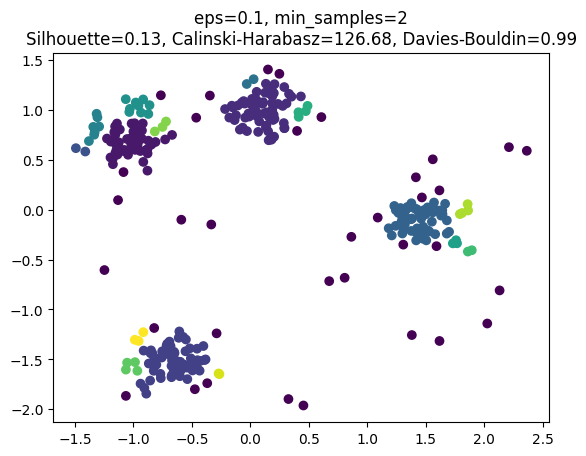

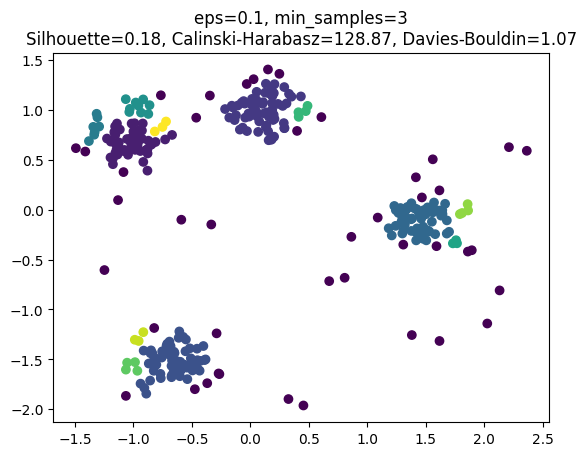

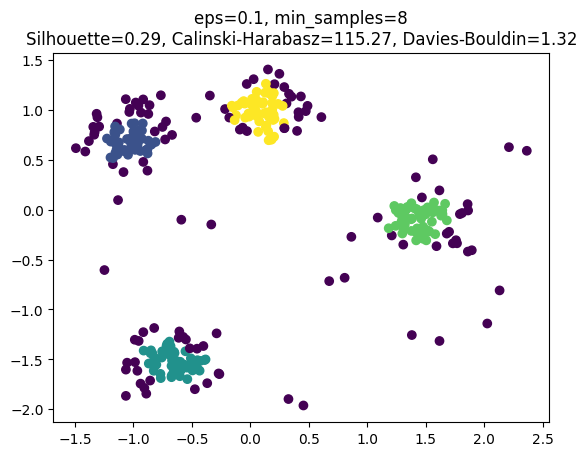

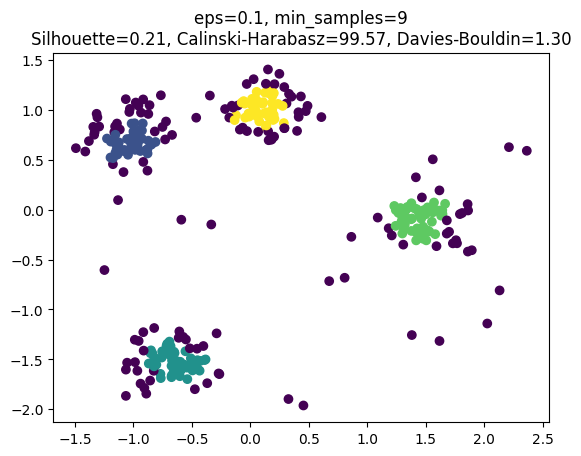

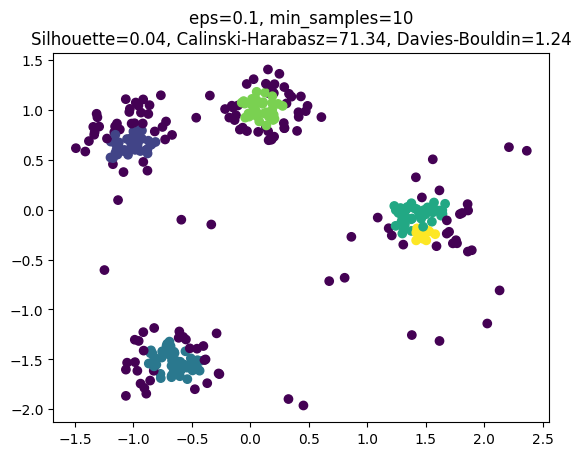

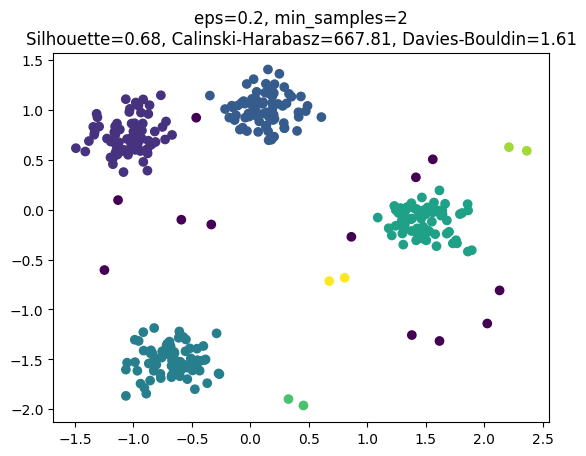

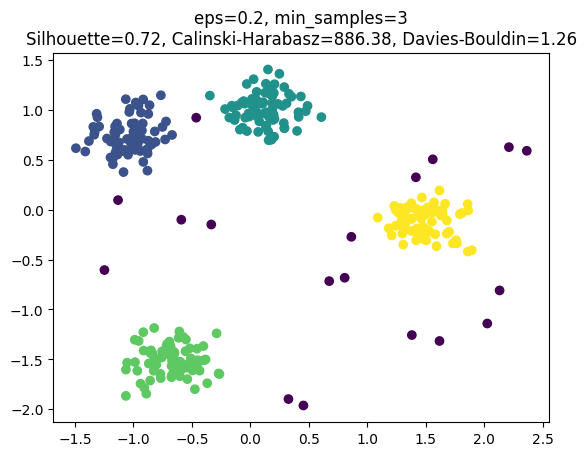

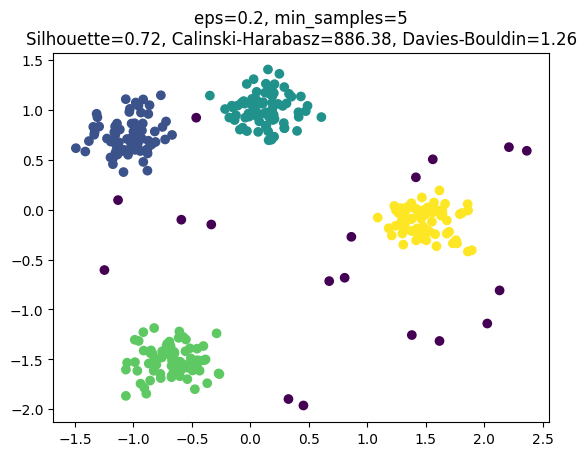

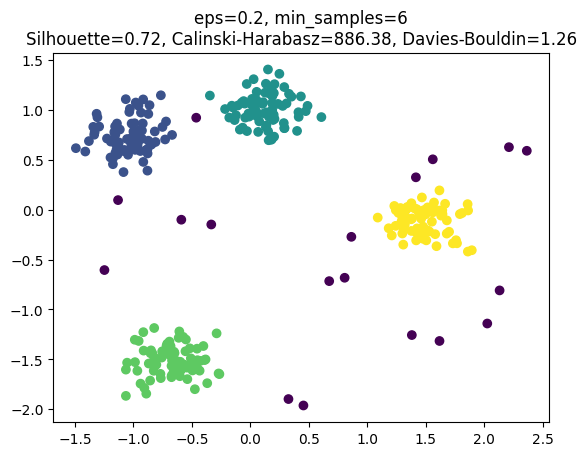

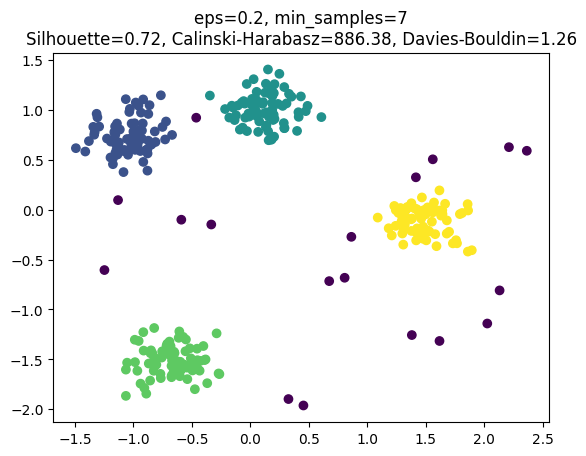

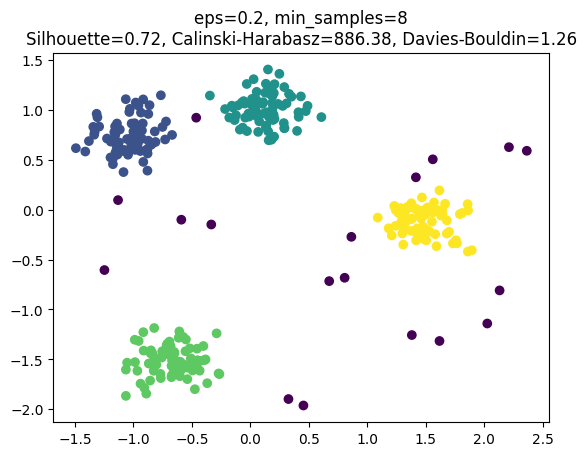

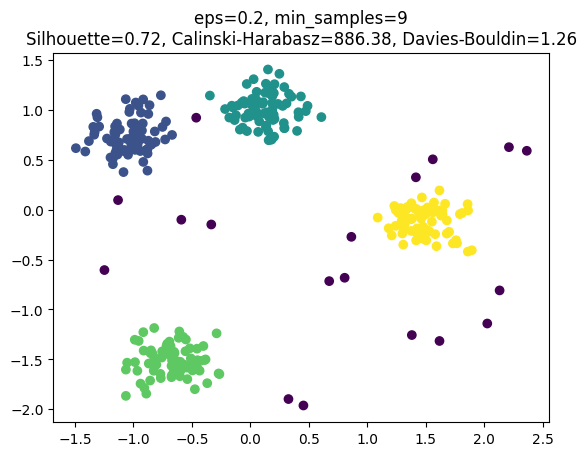

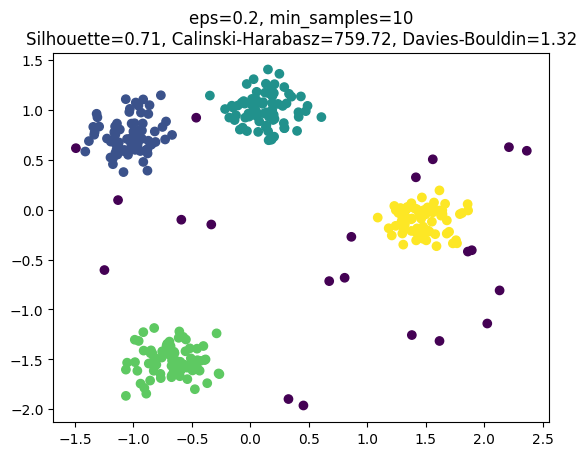

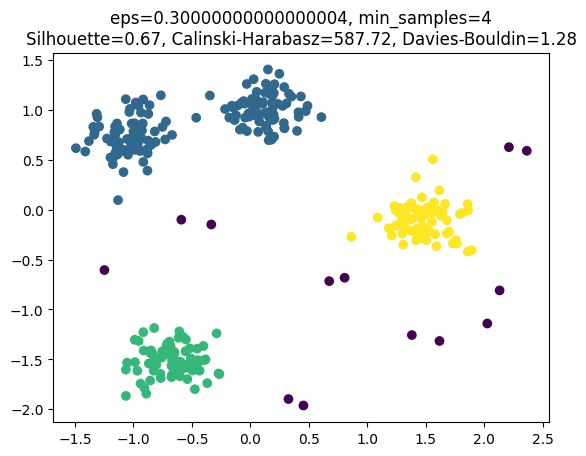

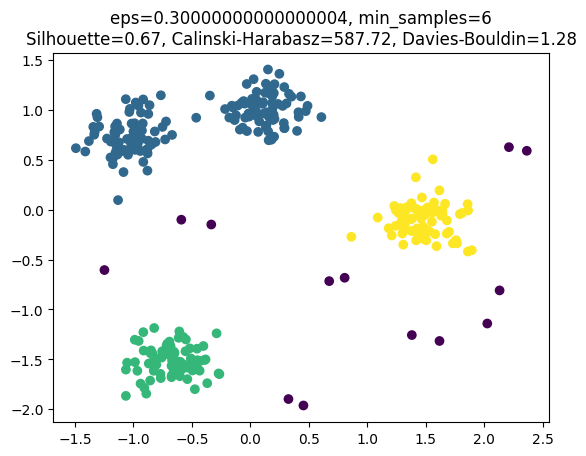

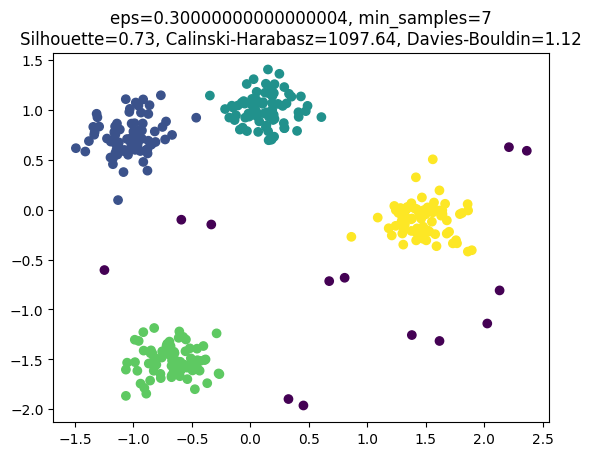

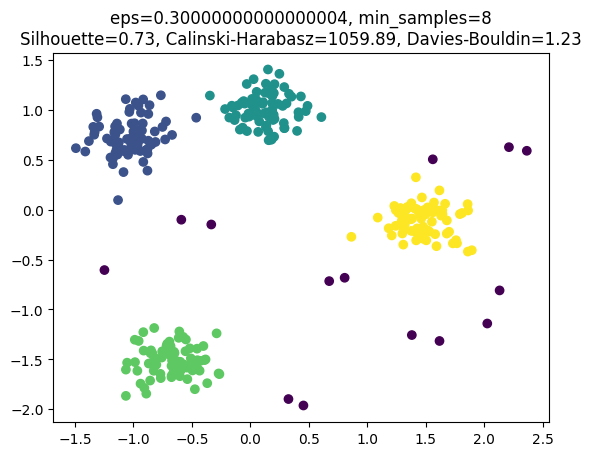

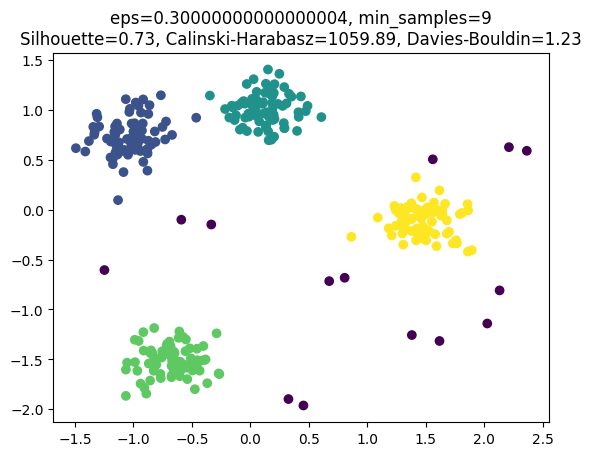

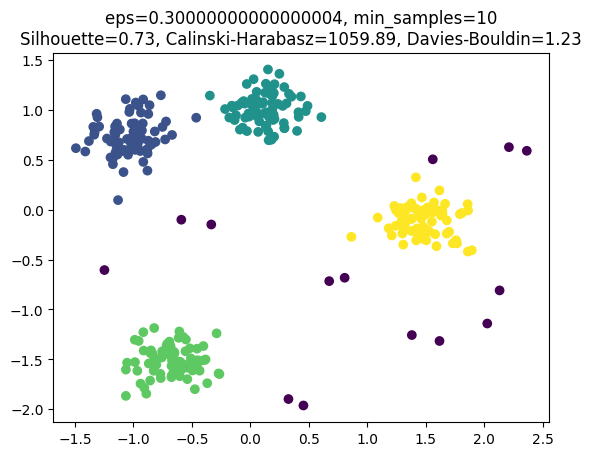

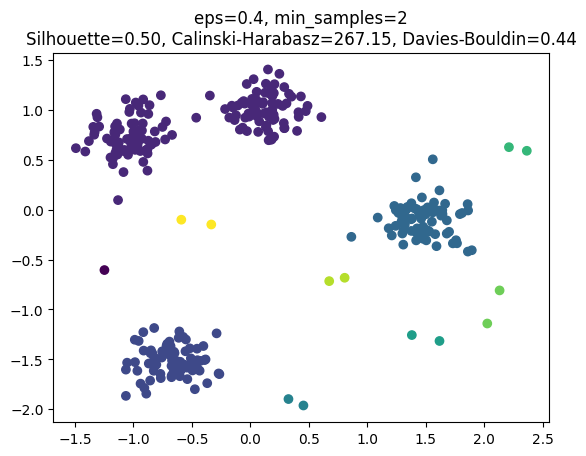

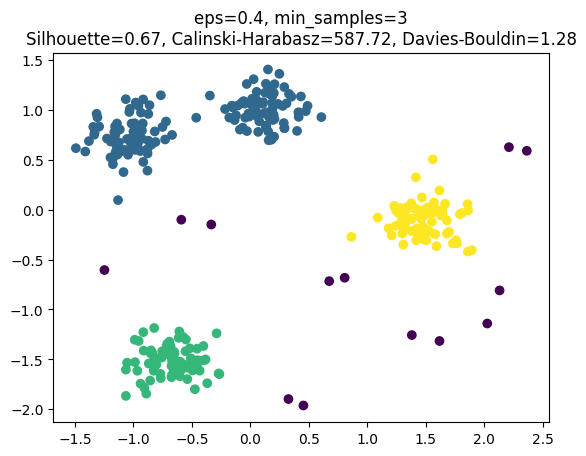

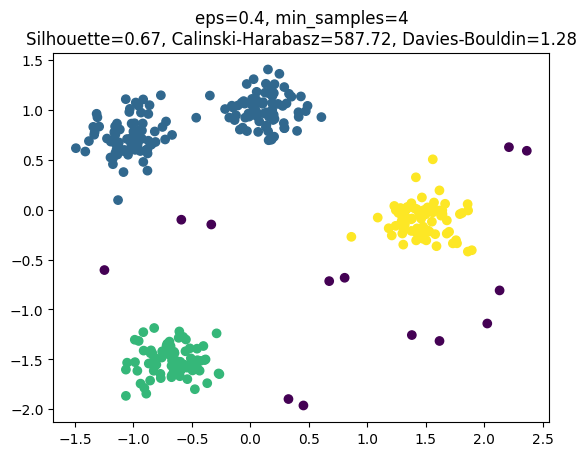

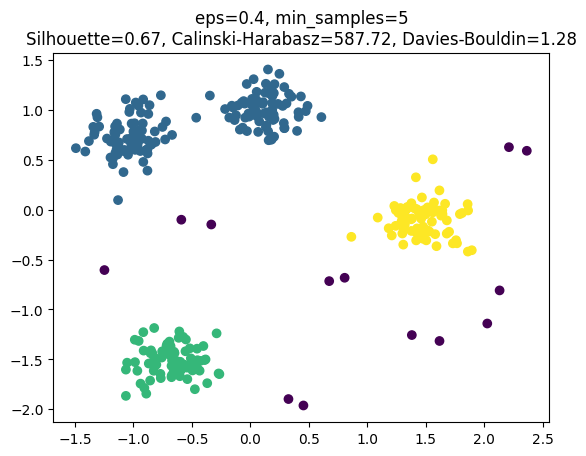

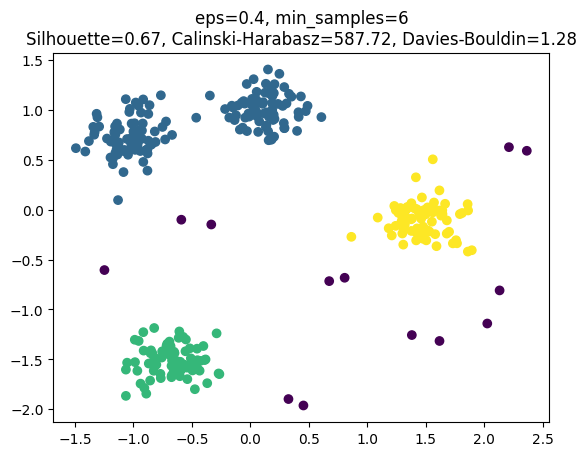

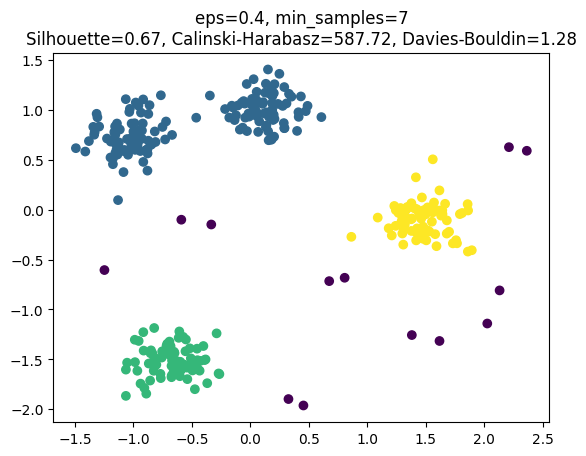

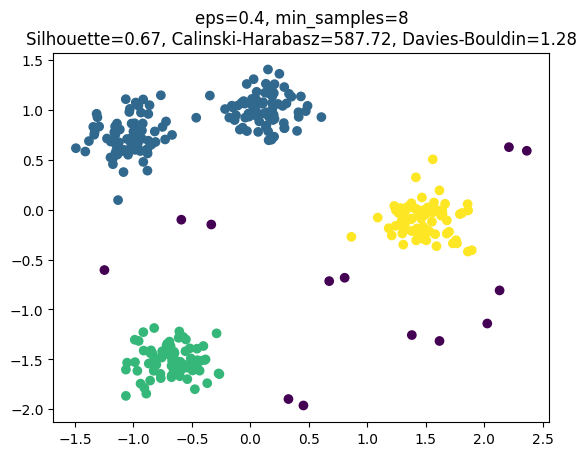

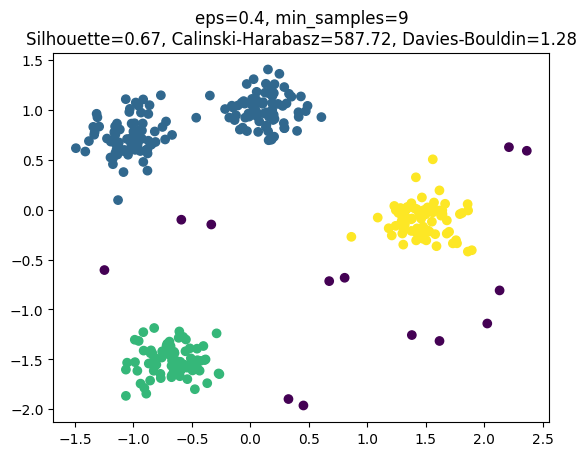

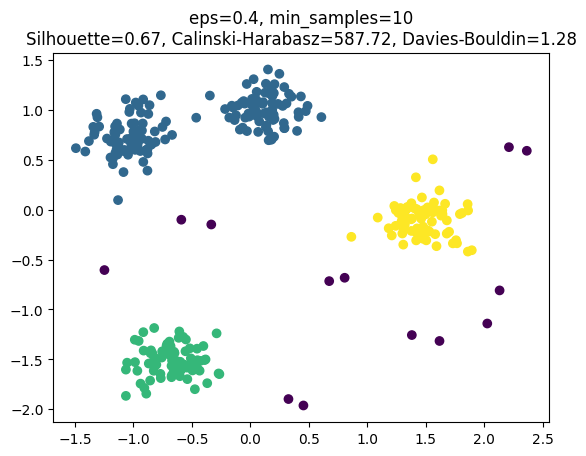

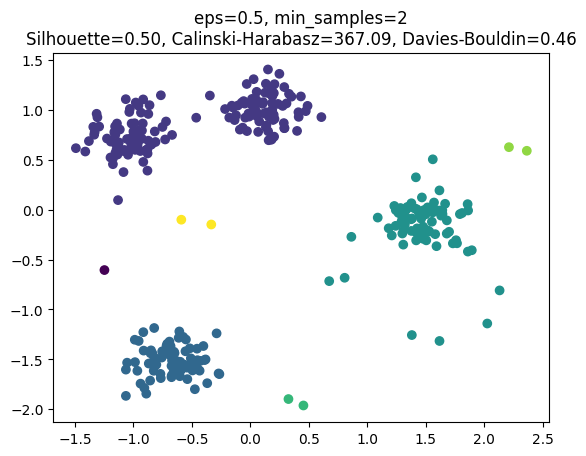

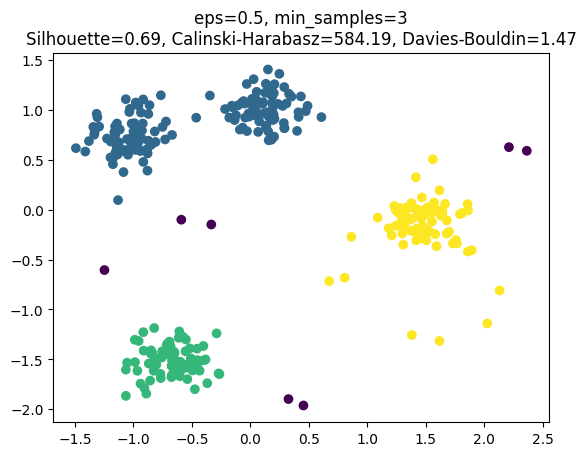

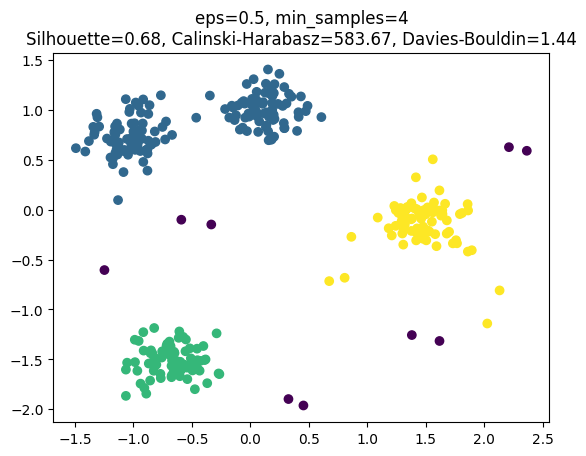

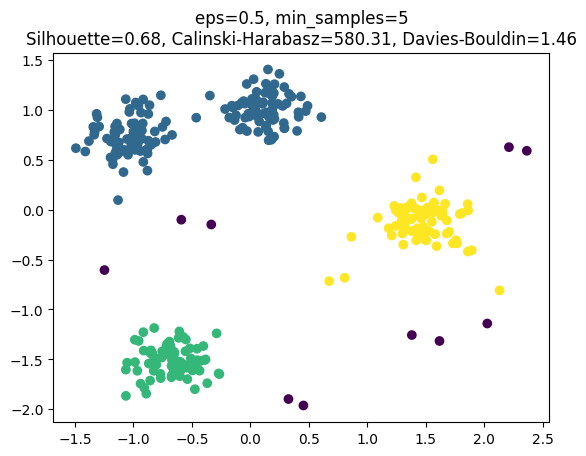

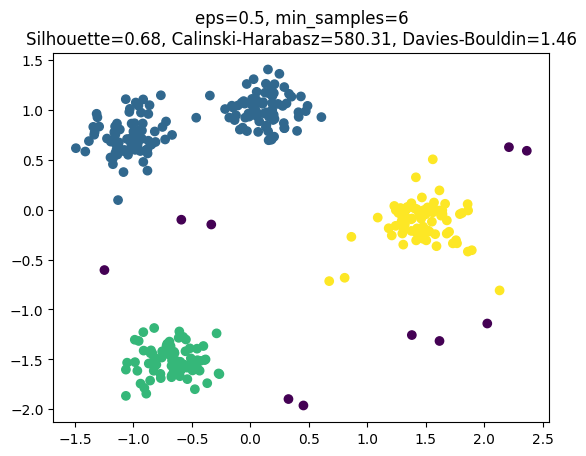

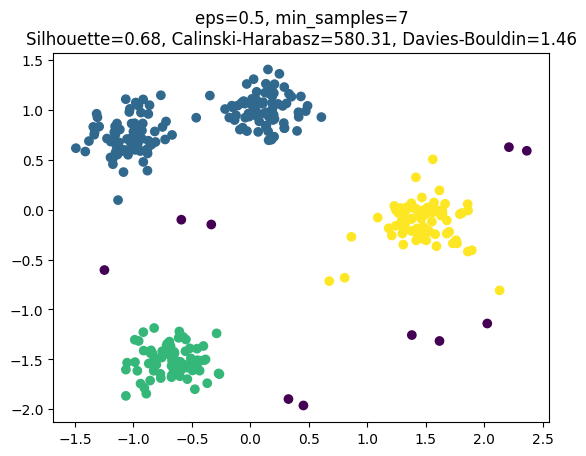

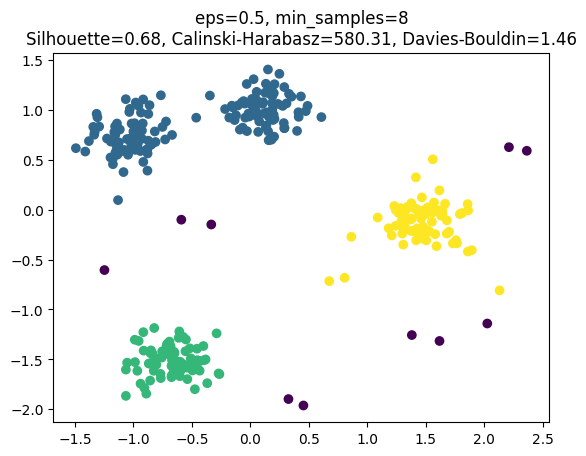

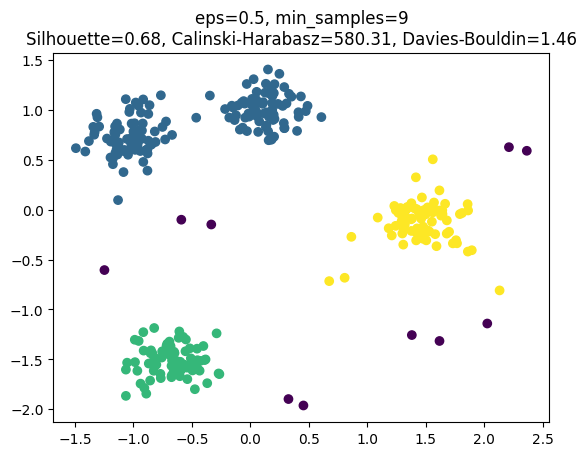

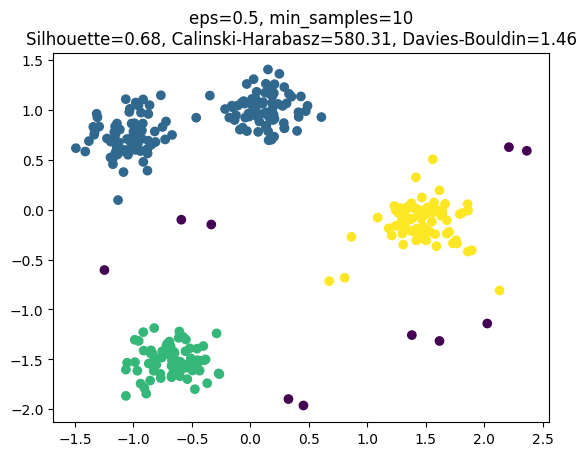

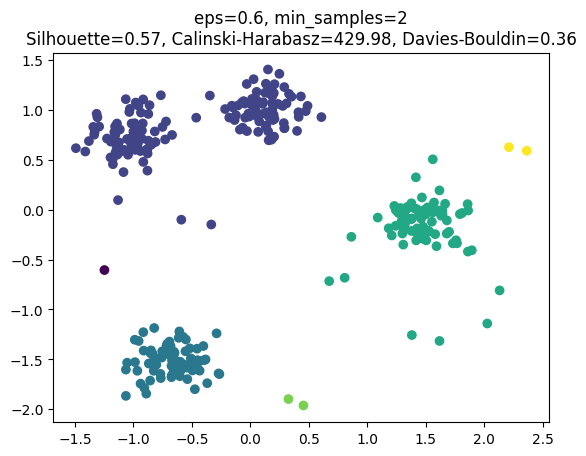

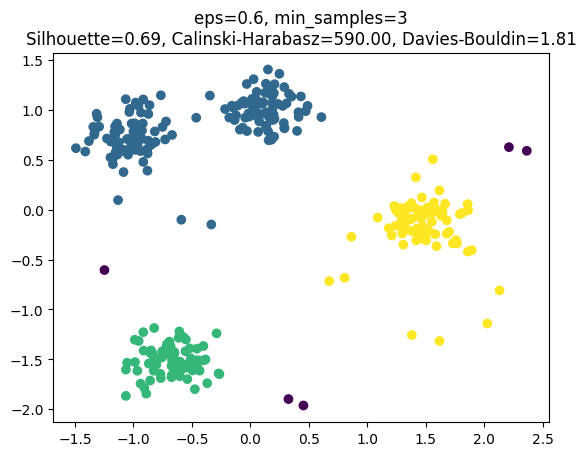

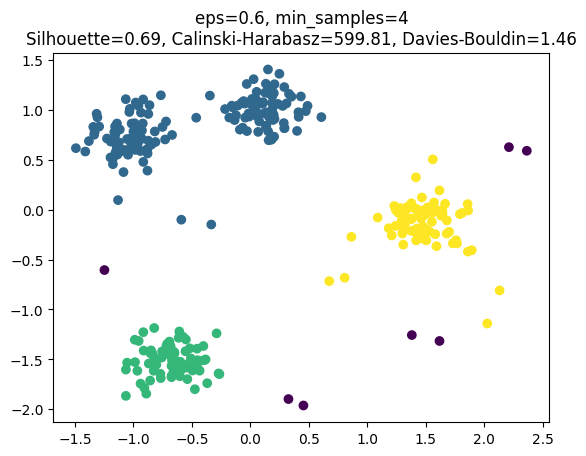

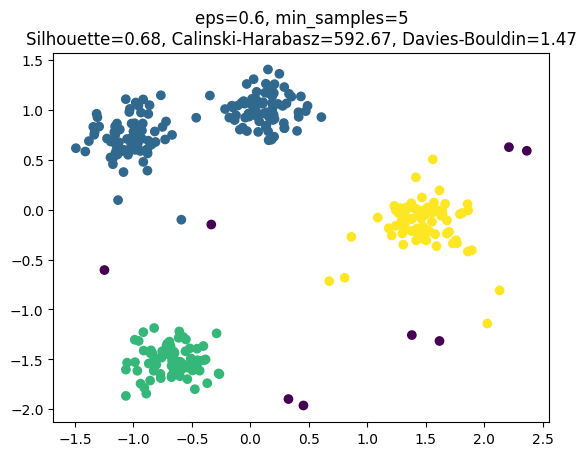

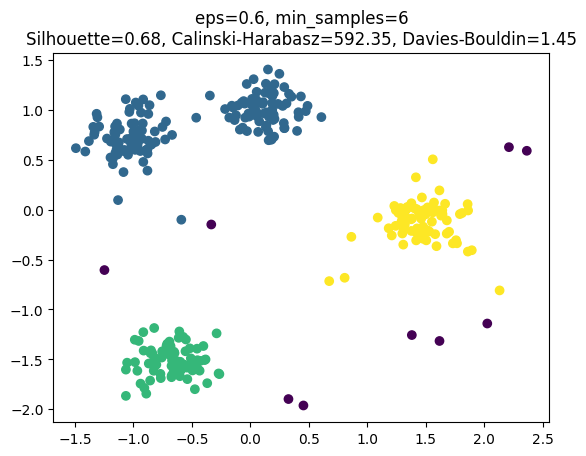

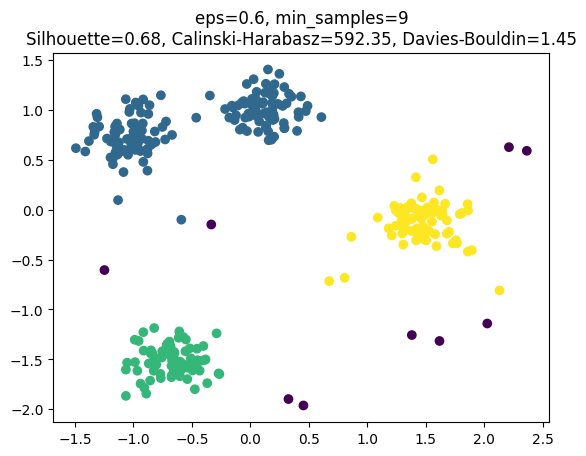

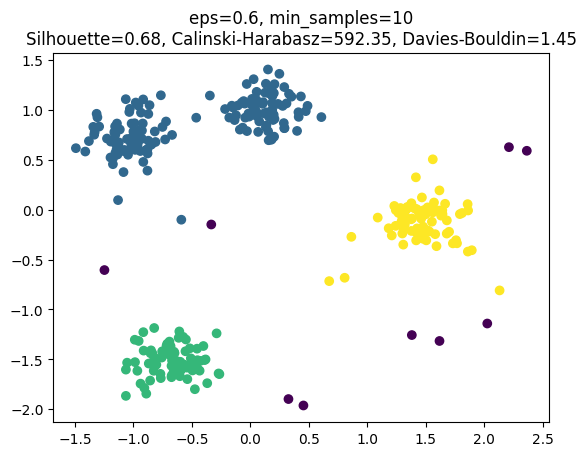

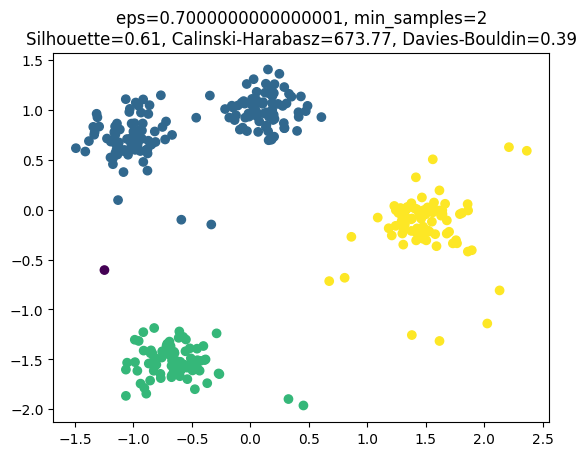

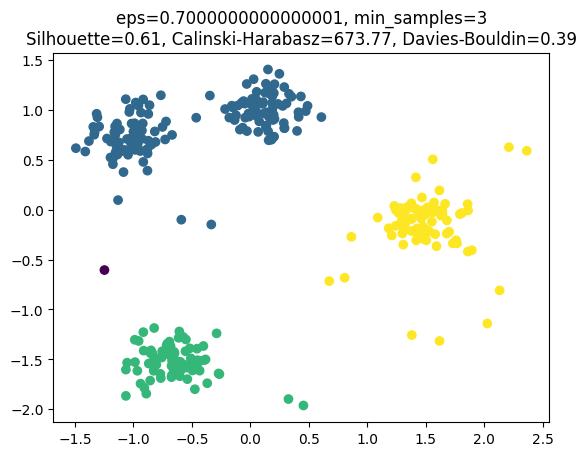

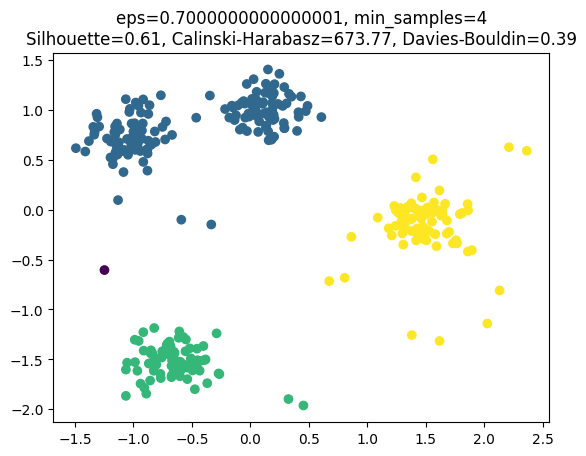

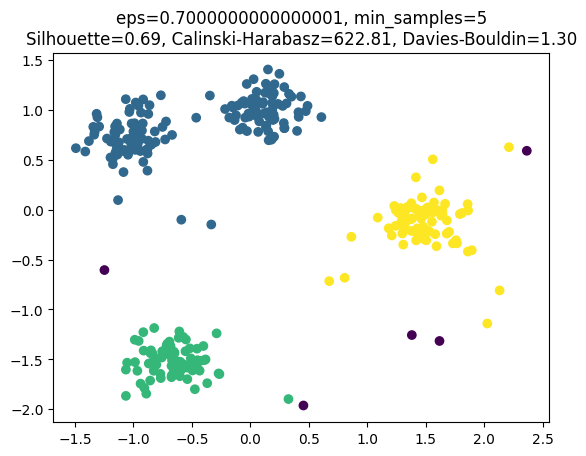

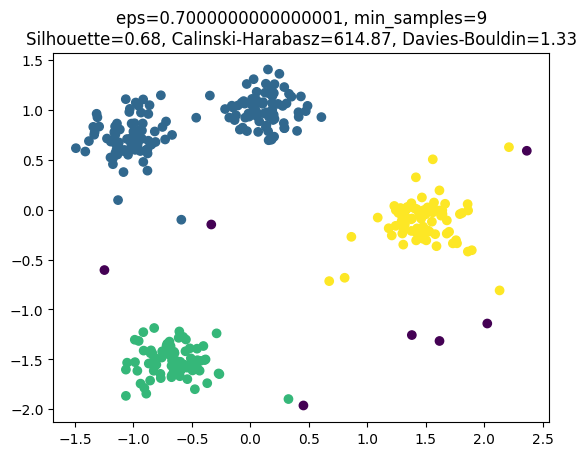

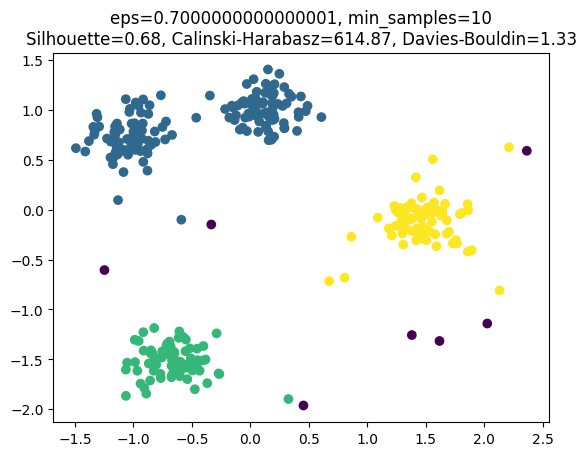

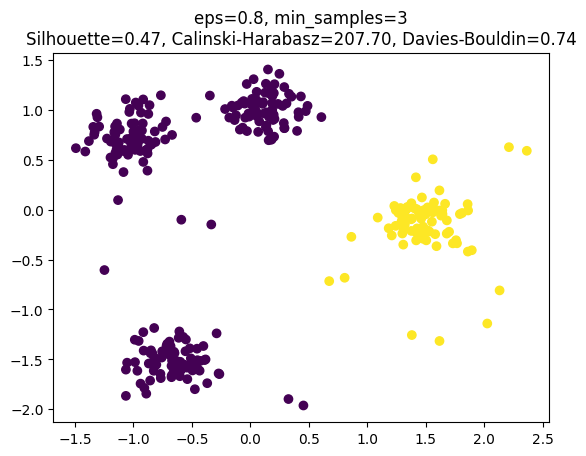

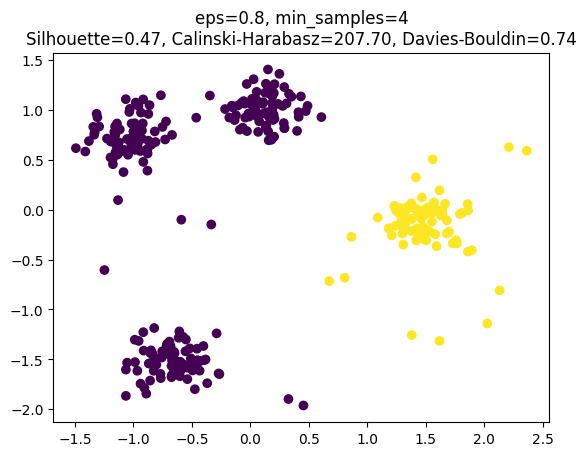

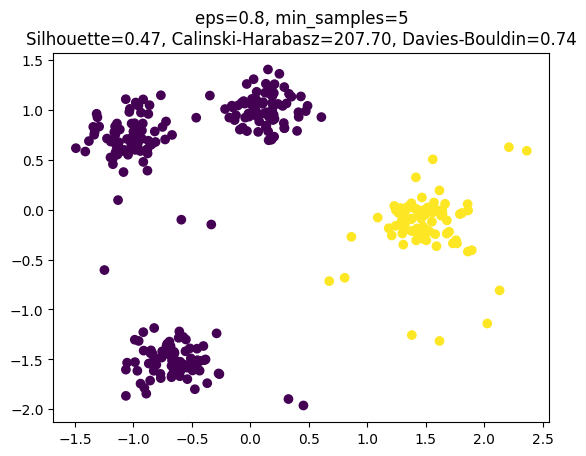

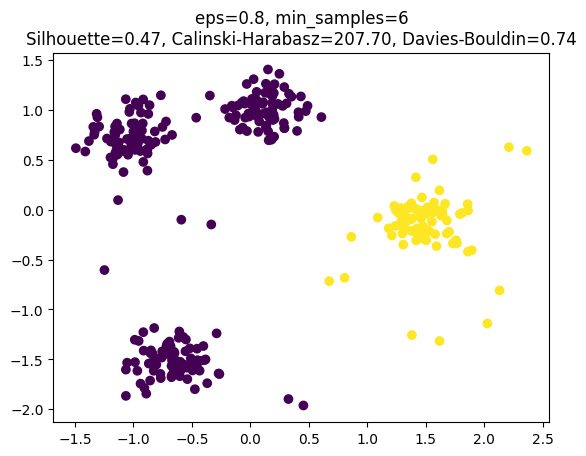

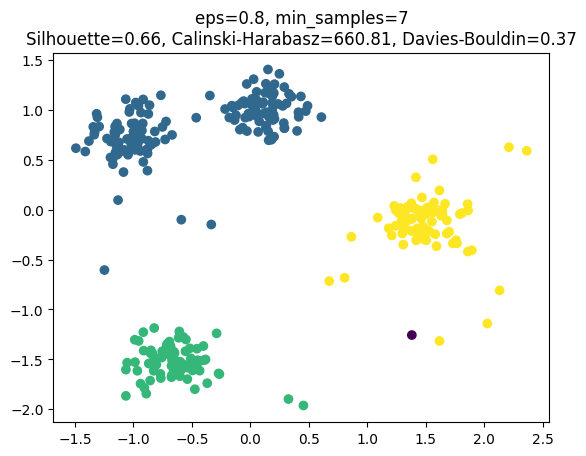

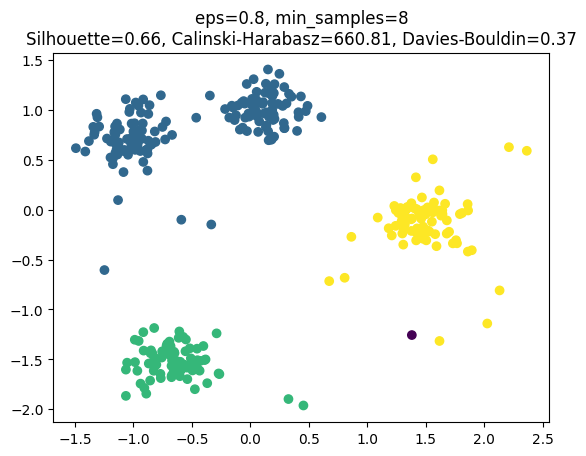

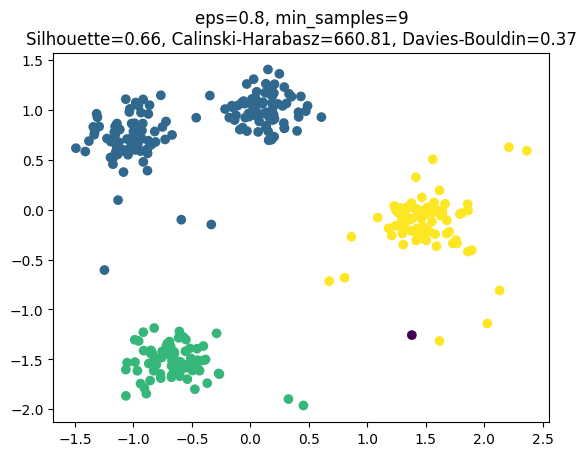

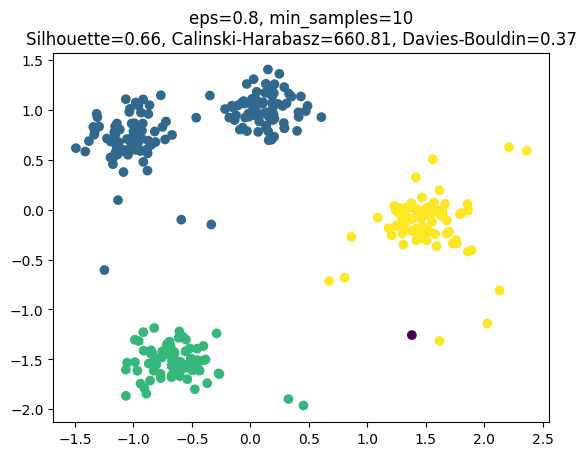

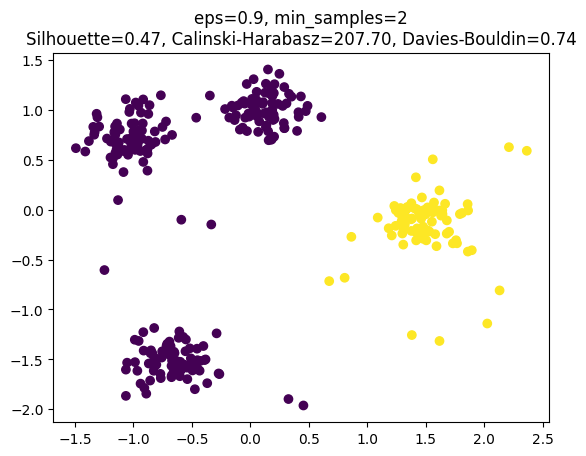

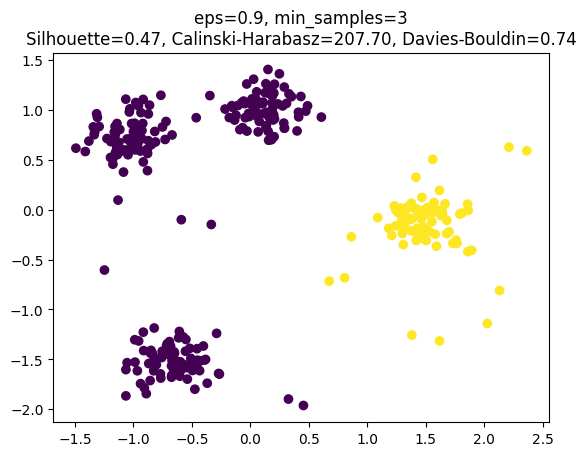

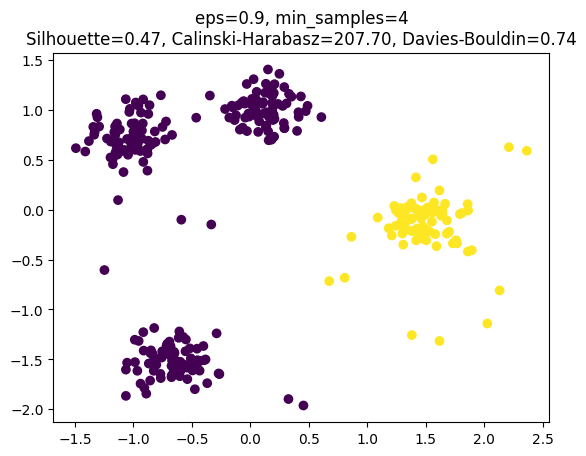

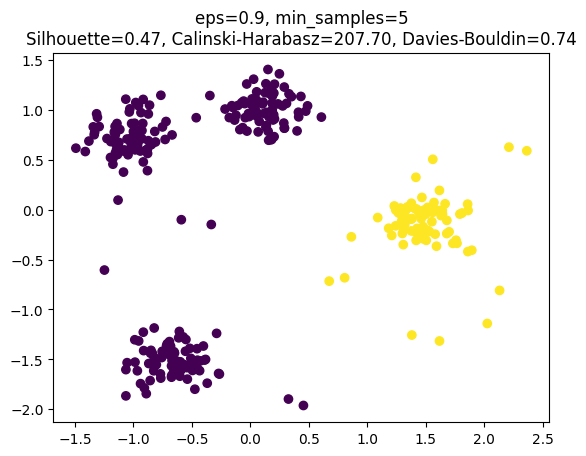

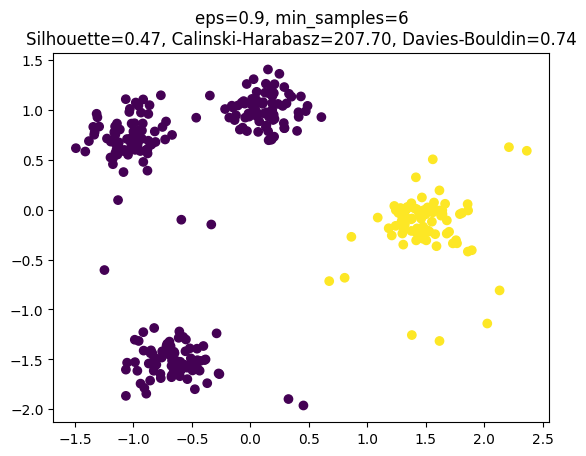

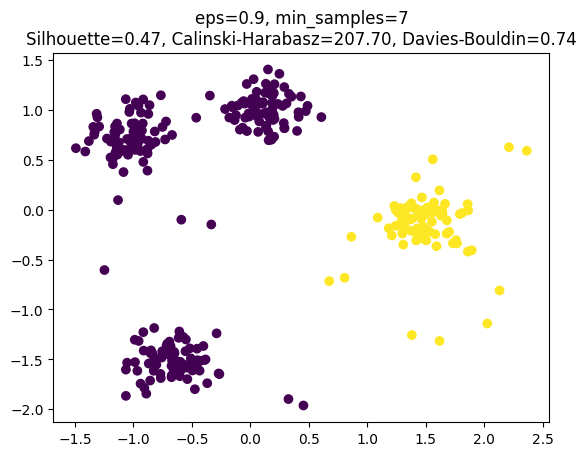

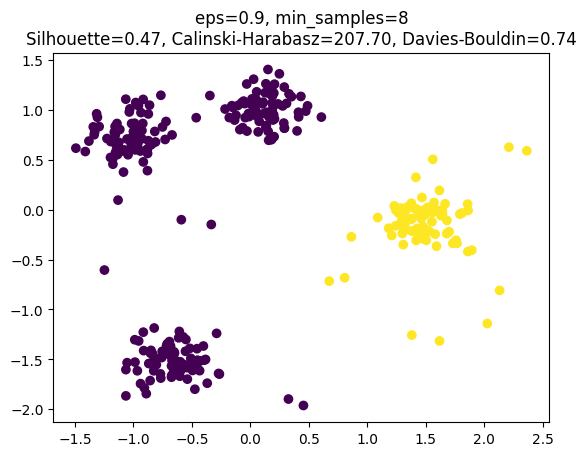

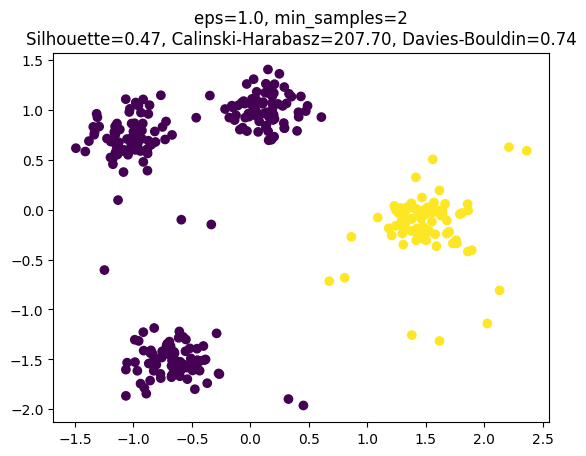

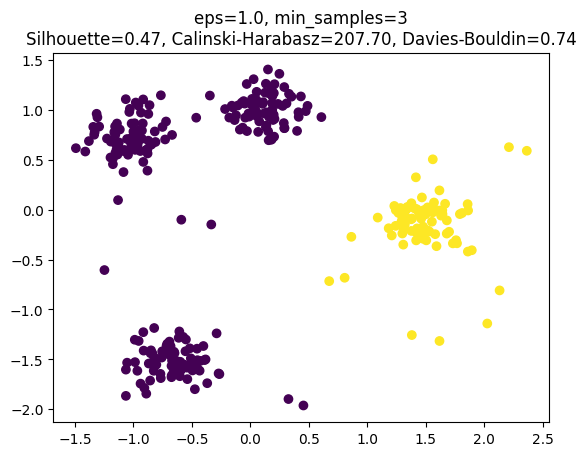

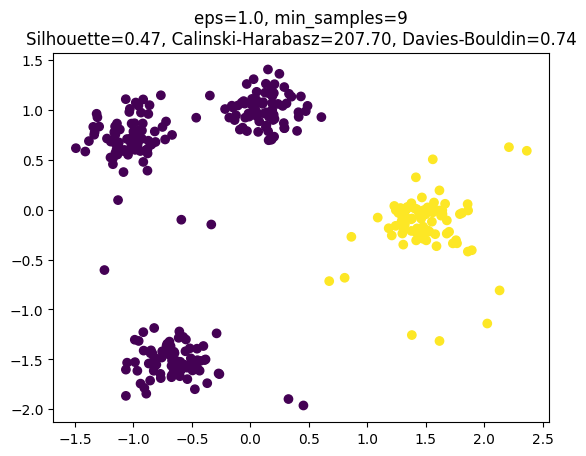

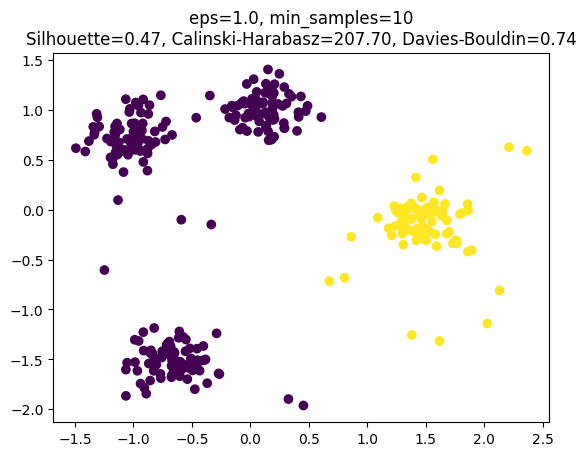

In [3]:
# Function to plot clustering results
def plot_clustering(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.show()

# Visualize clustering results for different parameter combinations
for params, scores in results:
    eps, min_samples = params
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    title = f"eps={eps}, min_samples={min_samples}\nSilhouette={scores[0]:.2f}, Calinski-Harabasz={scores[1]:.2f}, Davies-Bouldin={scores[2]:.2f}"
    plot_clustering(X_scaled, labels, title)

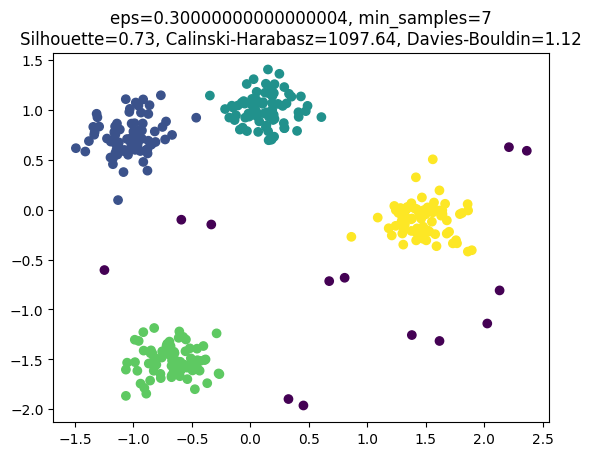

In [4]:
db = DBSCAN(eps=list(best_params)[0], min_samples=list(best_params)[1])
labels = db.fit_predict(X_scaled)
title = f"eps={list(best_params)[0]}, min_samples={list(best_params)[1]}\nSilhouette={list(best_scores)[0]:.2f}, Calinski-Harabasz={list(best_scores)[1]:.2f}, Davies-Bouldin={list(best_scores)[2]:.2f}"
plot_clustering(X_scaled, labels, title)